<a href="https://colab.research.google.com/github/GiX7000/deep-learning-with-pytorch/blob/main/learn-pytorch-with-X/Part02_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pytorch Workflow Fundamentals.

This notebook covers the following(one of many) Pytorch workflows:

1. Get data ready(turn into tensors)

2. Build or pick a pretrained model

3. Fit the model to the data and make prediction(inference)

4. Evaluate the model

5. Improve through experimentation

6. Save and reload the trained model

I highly recommend exploring [this source](https://pytorch.org/tutorials/beginner/basics/intro.html), as it provides an excellent introduction to PyTorch basics.

### 1. Load and Prepare the Data.

In [ ]:
import torch
from torch import nn # contains all of Pytorch's building blocks for neural networks
import matplotlib.pyplot as plt

# check pytorch version
torch.__version__

'1.13.0+cu116'

Data can be anything in machine learning: excel spreadsheets, images of any kind, videos, audio, dna, text.

Machine learning/Deep learning is a game of 2 parts:

1. Get data into numerical representation.

2. Build a model to learn pattern in that numerical representation.

Let's create some known data using linear regression formula.

In [ ]:
# create known parameters and functions
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

print(X[:10])
print(y[:10])
print(len(X), X.shape, len(y), y.shape)

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])
50 torch.Size([50, 1]) 50 torch.Size([50, 1])


Very important step in every ml task is to split the data into training, validation(not always) and test sets.

In [ ]:
# create training and test sets
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

torch.Size([40, 1]) torch.Size([40, 1])
torch.Size([10, 1]) torch.Size([10, 1])


In [ ]:
# visualize the data
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
  """
  plots training data, test data and compare predictions
  """
  plt.figure(figsize=(10, 7))
  # plot training data in blue
  plt.scatter(train_data, train_labels, c='b', s=4, label="Training data")

  # plot test data in green
  plt.scatter(test_data, test_labels, c='g', s=4, label="Testing data")

  # are there predictions?
  if predictions is not None:
    # plot predictions if they exist
    plt.scatter(test_data, predictions, c='r', s=4, label="Predictions")

  # show the legend
  plt.legend(prop={"size": 14});


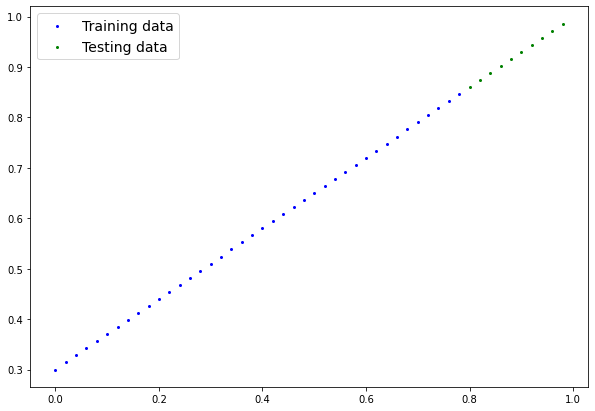

In [ ]:
plot_predictions()

### 2. Build a Pytorch model for linear regression.

We will use Object Oriented Programming([OOP](https://realpython.com/python3-object-oriented-programming/)).

1. We define the model's architecture.

2. We pick a loss function and an optimizer.

3. We build a training loop.

Our model first starts with random values for weight and bias and, then, looks at the training data and adjusts the random values to better represent(or get closer to) the ideal values(weight and bias). This is done by using 2 main algorithms: [gradient descent](https://www.youtube.com/watch?v=IHZwWFHWa-w) and [backpropagation](https://www.youtube.com/watch?v=Ilg3gGewQ5U) and we will use Pytorch to trigger these algorithms.

In [ ]:
import torch
from torch import nn
# create a linear regression class
class LinearRegressionClass(nn.Module): # our class inherits from nn.Module
  # init method as a constructor: to define and initialize the model's parameters
  def __init__(self):
    super().__init__()
    # behind the scenes, Pytorch sets requires_grad=True and dtype=torch.float32 by default(no need for you to set them)
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))

  # forward method to define the computation/operation in the model at every call
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias # linear regression formula


Some Pytorch model building essentials:
*   torch.nn: contains all of the buildings for computational graph(a neural network can be considered as a computational graph)
*   torch.nn.Parameter: what parameters our model should try and learn, often a Pytorch layer from torch.nn will set these for us
*   torch.nn.Module: the base class for all neural network modules. If you subclass it, you should overwrite forward(what we do above)
*   torch.optim: where the optimizers live, they help with gradient descent
*   def forward(): all nn.Module subclasses require you to overwrite forward(). This method defines what happens in the forward computation
*   torch.utils.data.Dataset: represents a map between label and sample pairs of your data
*   torch.utils.data.DataLoader: creates a python iterableover a torch dataset, which allows you to iterate over your data







In [ ]:
# checking the content of our pytorch model

# create a random seed, beacause we initialize the above parameters with random values, so every time we call the class, parameters take different values
torch.manual_seed(42)
# so, every time you use rand method, use also a random seed to secure random values from changing over iterations or testing, ...

# create an instance of the model
model_0 = LinearRegressionClass()

# check out the parameters
print(list(model_0.parameters()))

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]


In [ ]:
# list named parameters
model_0.state_dict()  # a dictionary with the parameters of the model

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

Generally, we need to move these values of weights and bias as close as possible to the ideal values and, of course, in most cases we don't know what the ideal values are.

Now, let's make some predictions with the model.

In [ ]:
# let's see how well our model predicts
with torch.inference_mode():  # we use it because we don't need to track the gradients
# or 'with torch.no_grad():'
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
# why to use with torch.inference_mode() ??
# let's try it without it
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

We can see that without inference_mode(), there is gradient tracking, something which is not needed when we make predictions. With gradient tracking, pytorch keeps data in memory, so without it, predictions would be faster!

We want these predictions close to real values y_test.

In [ ]:
# let's see how real y are
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [ ]:
# we can measure their difference by taking their distance
y_test - y_preds # (y_preds with inference_mode)

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]], grad_fn=<SubBackward0>)

RuntimeError: ignored

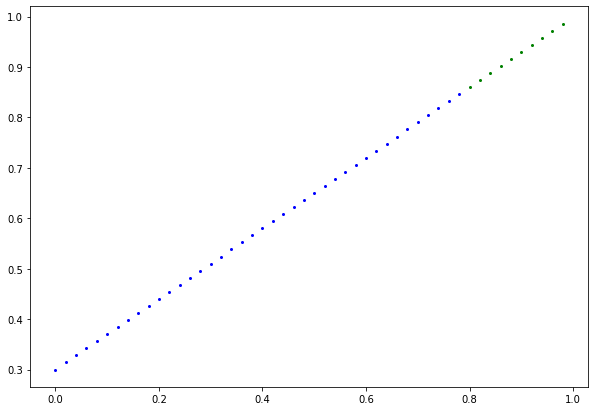

In [ ]:
# let's visualize real with predicted values
plot_predictions(predictions=y_preds)

This error occurs because we can't call numpy on a tensor that requires_grad=True, so we do the following

In [ ]:
with torch.no_grad():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

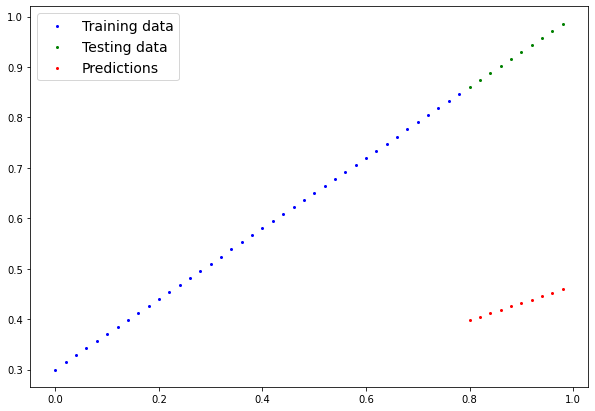

In [ ]:
# let's visualize real with predicted values now
plot_predictions(predictions=y_preds)

Our predictions are too far from where we want to be. But, by model training, we can make better predictions closer to the ideal line.

-- Picking a loss function and optimizer.

The whole idea in training is to move from unknown parameters(maybe random) to some known parameters Or to move from a poor representation of the data to a better representation of the data. Loss function and optimizer will help us to do this.

Loss function: measures how poor or how wrong your model's predictions are to the ideal outputs(also called cost function). The lower value loss function produces, the better it is.

Optimizer: takes into account the loss of the model and adjusts the model's parameters(weights and bias) to improve the loss function. It starts by taking some random values for the parameters and it gradually changes them in order to minimize the loss function. Inside the optimizer, you have to set two parameters: params, the model's parameters you want to optimize and lr, the learning rate which defines how small/big changes occured in each step.

In [ ]:
# setup a loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# setup an optimizer(stohastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)  # learning rate is possibly the most important learning hyper parameter we can set

But which optimizer and loss function to use?

Choosing optimizer is up to you as well as the learning rate. Both of them belong to the  hyperparameter tunning process. Regarding the problem you have to solve, you can choose the appropriate loss function, for example for a linear regression problem, you can choose nn.L1Loss, but for a binary classification task, you can choose nn.BCELoss.

-- Building a training loop. This includes:
*   loop through the data
*   forward pass to make predictions on data
*   calculate the loss(compare forward pass predictions to ground truth labels)
*   optimizer zero grad
*   loss backward - move backward through the network to calculate the gradients of each of the parameters of our model with respect to the loss(backpropagation algorithm)
*   optimizer step - use the optimizer to adjust the model's parameters to try and improve the loss(gradient descent algorithm)

In [ ]:
# let's check the model's random parameters before training
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# another hyperparameter is the number of looping over the data: epochs
epochs = 50  # play with this number!

### 3 & 4. Train and Evaluate the model.

All we need here in Pytorch is a training loop and a testing/evaluating loop.

In [ ]:
torch.manual_seed(42)
# training loop

# 1. loop through the data for a number of epochs
for epoch in range(epochs):
  # set the model in training mode(this is the default state of the model)
  model_0.train() # sets all parameters that require gradients ON!

  # 2. forward pass
  y_pred = model_0(X_train)

  # 3. calculate the loss
  loss = loss_fn(y_pred, y_train)
  #print(f"Loss: {loss}")

  # 4. optimizer zero grad
  optimizer.zero_grad() # zero the optimizer for the next iteration

  # 5. perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 6. optimizer step - perform gradient descent
  optimizer.step()



  # testing loop: evaluate the above trained model on test data

  model_0.eval()  # turns OFF(gradient tracking) different settings in the model not needed for evaluation/testing
  with torch.inference_mode():  # turns off gradient tracking
    # 1. forward pass
    test_pred = model_0(X_test)

    # 2. calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    # print ot whta's happening
    print(f"Epoch: {epoch}  | Loss: {loss} | Test Loss: {test_loss}")

    # print out model state dict
    print(model_0.state_dict())


Epoch: 0  | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10  | Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20  | Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30  | Loss: 0.053148526698350906 | Test Loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40  | Loss: 0.04543796554207802 | Test Loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])


In [ ]:
# let's see the model's parameters after the training
list(model_0.parameters())

[Parameter containing:
 tensor([0.4920], requires_grad=True), Parameter containing:
 tensor([0.3848], requires_grad=True)]

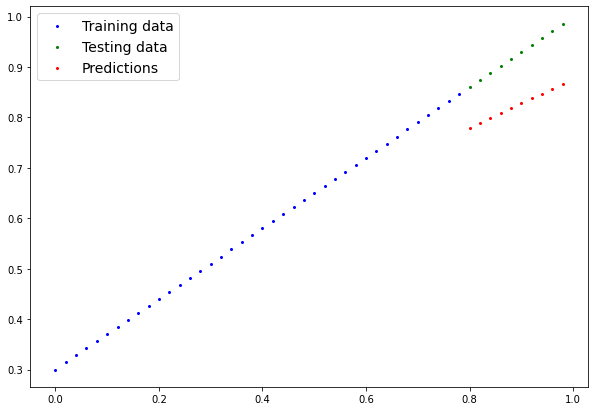

In [ ]:
# visulaize how good the the model performs on test data(red points)
plot_predictions(predictions=test_pred)

We can clearly see that after training, we have reduced the distance(loss) between the predicted values to ideal ones. Of course, we can further improve the model_0 to take even better predictions.

### 5. Experimentation.

To improve our model's performance, we do some experimentation. First, let's try to train for more epochs.

In [ ]:
# retrain the model for more epochs
epochs = 100

torch.manual_seed(42)
# training loop

# 1. loop through the data for a number of epochs
for epoch in range(epochs):
  # set the model in training mode(this is the default state of the model)
  model_0.train() # sets all parameters that require gradients ON!

  # 2. forward pass
  y_pred = model_0(X_train)

  # 3. calculate the loss
  loss = loss_fn(y_pred, y_train)
  #print(f"Loss: {loss}")

  # 4. optimizer zero grad
  optimizer.zero_grad() # zero the optimizer for the next iteration

  # 5. perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 6. optimizer step - perform gradient descent
  optimizer.step()



  # testing loop: evaluate the above trained model on test data

  model_0.eval()  # turns OFF(gradient tracking) different settings in the model not needed for evaluation/testing
  with torch.inference_mode():  # turns off gradient tracking
    # 1. forward pass
    test_pred = model_0(X_test)

    # 2. calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    # print ot whta's happening
    print(f"Epoch: {epoch}  | Loss: {loss} | Test Loss: {test_loss}")

    # print out model state dict
    print(model_0.state_dict())

Epoch: 0  | Loss: 0.04167863354086876 | Test Loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 10  | Loss: 0.03818932920694351 | Test Loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788]))])
Epoch: 20  | Loss: 0.03476089984178543 | Test Loss: 0.0805937647819519
OrderedDict([('weights', tensor([0.5288])), ('bias', tensor([0.3718]))])
Epoch: 30  | Loss: 0.03132382780313492 | Test Loss: 0.07232122868299484
OrderedDict([('weights', tensor([0.5459])), ('bias', tensor([0.3648]))])
Epoch: 40  | Loss: 0.02788739837706089 | Test Loss: 0.06473556160926819
OrderedDict([('weights', tensor([0.5629])), ('bias', tensor([0.3573]))])
Epoch: 50  | Loss: 0.024458957836031914 | Test Loss: 0.05646304413676262
OrderedDict([('weights', tensor([0.5800])), ('bias', tensor([0.3503]))])
Epoch: 60  | Loss: 0.021020207554101944 | Test Loss: 0.04819049686193466
OrderedDict([('weights', tensor([0.5972])), ('bias', tenso

In [ ]:
# let's see the model's parameters after the training
list(model_0.parameters())

[Parameter containing:
 tensor([0.6638], requires_grad=True), Parameter containing:
 tensor([0.3153], requires_grad=True)]

Weights parameter is very close to 0.7 and bias to 0.3, the ideal values we want for our parameters.

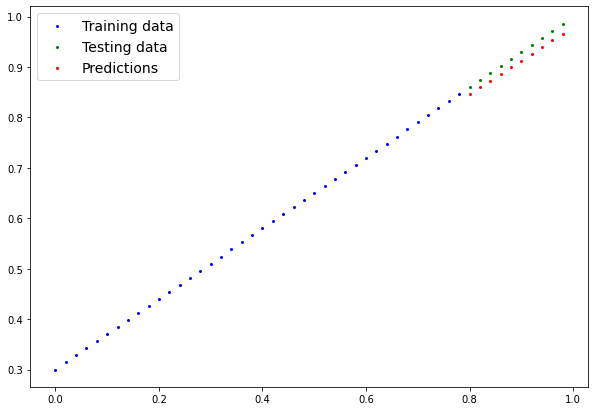

In [ ]:
# visulaize how good the the model performs on test data(red points)
plot_predictions(predictions=test_pred)

Much better results now as the predicted values came close to ideal ones.

Another implementation for even more epochs.

In [ ]:
torch.manual_seed(42)
# create another instance of the model
model_0 = LinearRegressionClass()

# check out the parameters
print(list(model_0.parameters()))

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]


In [ ]:
# setup a loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# setup an optimizer(stohastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [ ]:
epochs = 200

# track different values to compare fifferent models with different settings
epoch_count = []
loss_values = []
test_loss_values = []


# training loop

# 1. loop through the data for a number of epochs
for epoch in range(epochs):
  # set the model in training mode(this is the default state of the model)
  model_0.train() # sets all parameters that require gradients ON!

  # 2. forward pass
  y_pred = model_0(X_train)

  # 3. calculate the loss
  loss = loss_fn(y_pred, y_train)
  #print(f"Loss: {loss}")

  # 4. optimizer zero grad
  optimizer.zero_grad() # zero the optimizer for the next iteration

  # 5. perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 6. optimizer step - perform gradient descent
  optimizer.step()



  # testing loop: evaluate the above trained model on test data

  model_0.eval()  # turns OFF(gradient tracking) different settings in the model not needed for evaluation/testing
  with torch.inference_mode():  # turns off gradient tracking
    # 1. forward pass
    test_pred = model_0(X_test)

    # 2. calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  # print ot whta's happening
  if epoch % 10 == 0:

    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch}  | ΜΑΕ Train Loss: {loss} | MAE Test Loss: {test_loss}")

    # print out model state dict
    print(model_0.state_dict())

Epoch: 0  | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10  | Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20  | Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30  | Loss: 0.053148526698350906 | Test Loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40  | Loss: 0.04543796554207802 | Test Loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50  | Loss: 0.04167863354086876 | Test Loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60  | Loss: 0.03818932920694351 | Test Loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor(

In [ ]:
# let's see the model's parameters after the training
list(model_0.parameters())

[Parameter containing:
 tensor([0.6990], requires_grad=True), Parameter containing:
 tensor([0.3093], requires_grad=True)]

We see above and below that for even more epochs, we get better results.

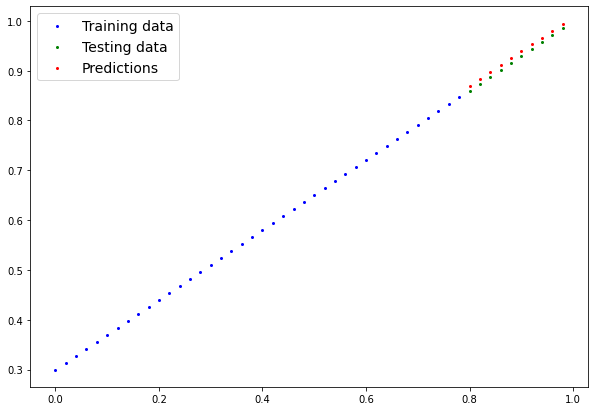

In [ ]:
# visulaize how good the the model performs on test data(red points)
plot_predictions(predictions=test_pred)

RuntimeError: ignored

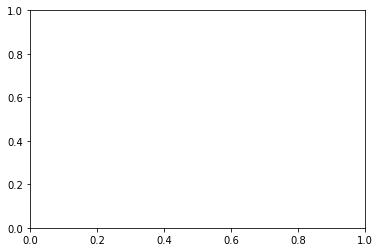

In [ ]:
# plot loss curves
plt.plot(epoch_count, loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
# as we see loss_values are tensors and numpy does not accept them(matplotlib works with numpy)
loss_values

[tensor(0.3129, grad_fn=<MeanBackward0>),
 tensor(0.1977, grad_fn=<MeanBackward0>),
 tensor(0.0891, grad_fn=<MeanBackward0>),
 tensor(0.0531, grad_fn=<MeanBackward0>),
 tensor(0.0454, grad_fn=<MeanBackward0>),
 tensor(0.0417, grad_fn=<MeanBackward0>),
 tensor(0.0382, grad_fn=<MeanBackward0>),
 tensor(0.0348, grad_fn=<MeanBackward0>),
 tensor(0.0313, grad_fn=<MeanBackward0>),
 tensor(0.0279, grad_fn=<MeanBackward0>),
 tensor(0.0245, grad_fn=<MeanBackward0>),
 tensor(0.0210, grad_fn=<MeanBackward0>),
 tensor(0.0176, grad_fn=<MeanBackward0>),
 tensor(0.0142, grad_fn=<MeanBackward0>),
 tensor(0.0107, grad_fn=<MeanBackward0>),
 tensor(0.0073, grad_fn=<MeanBackward0>),
 tensor(0.0039, grad_fn=<MeanBackward0>),
 tensor(0.0089, grad_fn=<MeanBackward0>),
 tensor(0.0089, grad_fn=<MeanBackward0>),
 tensor(0.0089, grad_fn=<MeanBackward0>)]

In [ ]:
# transform loss values to numpy
import numpy as np
loss_values = np.array(torch.tensor(loss_values))
loss_values

array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
       0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
       0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
       0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
      dtype=float32)

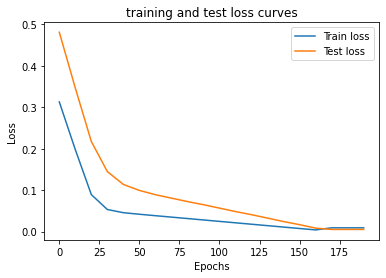

In [ ]:
# and plot the loss curves now
plt.plot(epoch_count, loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

### 6. Save and reload the trained model.

There 3 main methods for saving and loading models in Pytorch:

1. toch.save() - allows you to save a pytorch object in python's pickle format.

2. torch.load() - allows you to load a saved pytorch object.

3. torch.nn.Module.load_state_dict() - allows you to load a model's saved state dictionary.

In [ ]:
# current model's dictionary state
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# saving our Pytorch model
from pathlib import Path

# 1. create model's directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. create model save path
MODEL_NAME = "model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

PosixPath('models/model_0.pth')

In [ ]:
# 3. save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/model_0.pth


In [ ]:
# check what's inside models file
!ls -l models

total 4
-rw-r--r-- 1 root root 1063 Jan 11 14:14 model_0.pth


In [ ]:
# loading a pytorch model (in a state_dict)

# to load in a saved state_dict, we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionClass()
# what is the state_dict of a new instance - random parameters values
print(loaded_model_0.state_dict())

# load the saved state_dict of model_0(this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

OrderedDict([('weights', tensor([2.2082])), ('bias', tensor([-0.6380]))])


<All keys matched successfully>

In [ ]:
# let's check now what's the state_dict of the loaded model
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

So, we successfully loaded the saved model through model's saved state dictionary.

In [ ]:
# make some predictions with our loaded model on test data!!
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
# also calculate original y_preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
# compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

So, now we can take the same results from the original and the loaded models.

### 7. Putting it all together(with device agnostic code).

Let's go back through the steps above and see it all in one place.

In [ ]:
# import pytorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# check pytorch version
torch.__version__

'1.13.0+cu116'

Create device agnostic code: this means if we've got access to a GPU, our code will use it for potentially faster computing. If no GPU is available, the code will default to using CPU.


In [ ]:
# setup agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [ ]:
# check the gpu we use
!nvidia-smi

Wed Jan 11 14:46:07 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8    11W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

7.1. Create and prepare the data.

In [ ]:
# create some data using the linear regression formula of y = weight * X + bias
weight = 0.2
bias = 0.1

# create range values
start = 0
end = 1
step = 0.02

# create X and y
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze errors will pop up->check it!
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.1000],
         [0.1040],
         [0.1080],
         [0.1120],
         [0.1160],
         [0.1200],
         [0.1240],
         [0.1280],
         [0.1320],
         [0.1360]]))

In [ ]:
# split the data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

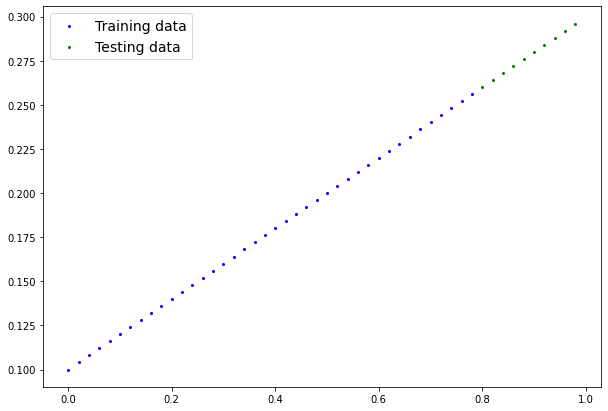

In [ ]:
# function to visualize the data
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
  """
  plots training data, test data and compare predictions
  """
  plt.figure(figsize=(10, 7))
  # plot training data in blue
  plt.scatter(train_data, train_labels, c='b', s=4, label="Training data")

  # plot test data in green
  plt.scatter(test_data, test_labels, c='g', s=4, label="Testing data")

  # are there predictions?
  if predictions is not None:
    # plot predictions if they exist
    plt.scatter(test_data, predictions, c='r', s=4, label="Predictions")

  # show the legend
  plt.legend(prop={"size": 14});

# plot the data
plot_predictions(X_train, y_train, X_test, y_test)

7.2. Build a Pytorch linear model.

In [ ]:
# create a linear regression model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):

  def __init__(self):
    super().__init__()
    # this time we will use a layer which will initialize the weight and bias parameters for us!
    # use nn.Linear() for creating and initializing the model parameters
    self.linear_layer = nn.Linear(in_features=1,  # what data comes in the layer
                                  out_features=1) # what data comes out of the layer

  def forward(self, x: torch.Tensor) -> torch.Tensor: # tensor x as input and the output will also be a tensor
    return self.linear_layer(x)

# set the manual seed
torch.manual_seed(42)

# create an instance of the above class
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

7.3. Train the model.

In [ ]:
# check the model's current device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
# set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

So, now our model is on the target device cuda!

In [ ]:
# before we go to the training loop, let's check again(!) what parameters we have
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8300], device='cuda:0'))])

In [ ]:
# setup a loss function
loss_fn = nn.L1Loss() # MAE

# setup an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.01)

In [ ]:
torch.manual_seed(42)

epochs = 200

for epoch in range(epochs):
  # training loop
  model_1.train()

  y_pred = model_1(X_train)

  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # testing loop
  model_1.eval()

  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

    # print what's happening
    if epoch % 0 == 0:
      print(f"Epoch: {epoch}, | Train Loss: {loss} | Test Loss: {test_loss}")


RuntimeError: ignored

This error occurs because we haven't written agnostic code for the data! And we need to have all the things to same device, both data and model!

In [ ]:
# put the data on the target device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

In [ ]:
# and now run again the training loop
torch.manual_seed(42)

epochs = 200

for epoch in range(epochs):
  # training loop
  model_1.train()

  y_pred = model_1(X_train)

  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # testing loop
  model_1.eval()

  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

    # print what's happening
    if epoch % 10 == 0:
      print(f"Epoch: {epoch}, | Train Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0, | Train Loss: 0.9386569857597351 | Test Loss: 1.2055052518844604
Epoch: 10, | Train Loss: 0.823447048664093 | Test Loss: 1.0707954168319702
Epoch: 20, | Train Loss: 0.7082372307777405 | Test Loss: 0.9360856413841248
Epoch: 30, | Train Loss: 0.5930272936820984 | Test Loss: 0.8013758063316345
Epoch: 40, | Train Loss: 0.47781744599342346 | Test Loss: 0.6666659712791443
Epoch: 50, | Train Loss: 0.36260756850242615 | Test Loss: 0.531956136226654
Epoch: 60, | Train Loss: 0.24739766120910645 | Test Loss: 0.39724621176719666
Epoch: 70, | Train Loss: 0.1321876496076584 | Test Loss: 0.26253625750541687
Epoch: 80, | Train Loss: 0.058716487139463425 | Test Loss: 0.1599355787038803
Epoch: 90, | Train Loss: 0.04477839544415474 | Test Loss: 0.11540555953979492
Epoch: 100, | Train Loss: 0.040387626737356186 | Test Loss: 0.09695424884557724
Epoch: 110, | Train Loss: 0.036897625774145126 | Test Loss: 0.08593424409627914
Epoch: 120, | Train Loss: 0.03345184773206711 | Test Loss: 0.0776617825031

In [ ]:
# check the optimized values of the model parameters now
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.2297]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.0875], device='cuda:0'))])

Remember we set weight=0.1 and bias=0.1 as ideal values above and our model based on our data found some values very close to initial target ones! But, inpractice, we don't know the target values of parameters and we will also have millions of parameters.

7.4. Evaluate the model.

In [ ]:
# turn the model into eval mode
model_1.eval()

# make predictions on test data
with torch.inference_mode():
  y_preds = model_1(X_test)

y_preds

tensor([[0.2713],
        [0.2759],
        [0.2805],
        [0.2851],
        [0.2897],
        [0.2943],
        [0.2988],
        [0.3034],
        [0.3080],
        [0.3126]], device='cuda:0')

Notice that y_preds are also on the cuda device.

Evaluation through visualization.

TypeError: ignored

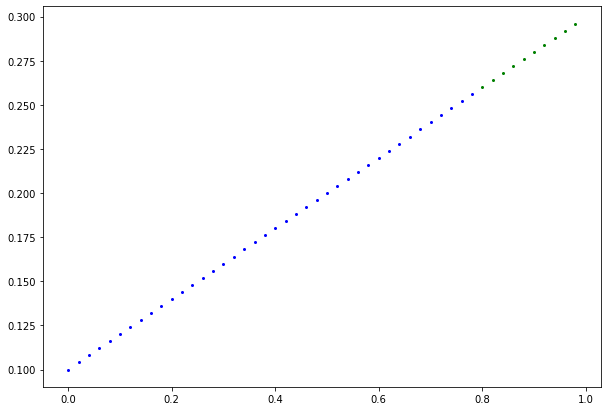

In [ ]:
# check out our predictions visually
plot_predictions(predictions=y_preds)

plot_predictions function uses matplotlib, which works with numpy and numpy is cpu based! So, we need to transfer our predictions on cpu!

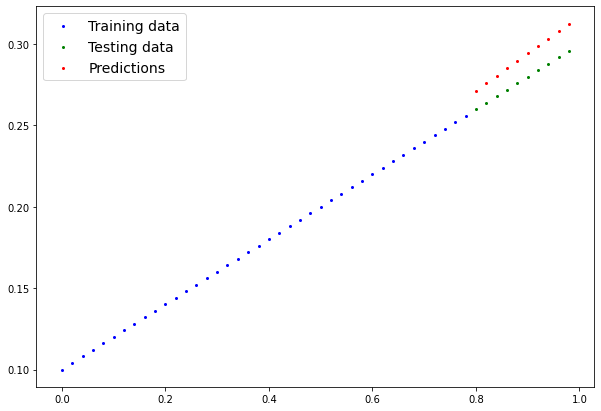

In [ ]:
# check out our predictions visually having predictions on cpu now
plot_predictions(predictions=y_preds.cpu())

Red dots represnt the predictions on thetest data and they are very close to the real values.

7.5. Saving and loading the model.

In [ ]:
from pathlib import Path

# create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# create model save path
MODEL_NAME = "model_1.pth"
MODEL_SAVE_NAME = MODEL_PATH / MODEL_NAME # it is MODEL_SAVE_PATH instead of MODEL_SAVE_NAME !!

MODEL_SAVE_NAME

PosixPath('models/model_1.pth')

In [ ]:
# save the model state dictionary
print(f"Saving model to: {MODEL_SAVE_NAME}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_NAME)

Saving model to: models/model_1.pth


In [ ]:
# check model_1 state_dict
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.2297]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.0875], device='cuda:0'))])

Perfevt, we have successfully save dthe trained model!

In [ ]:
# let's load the saved model now

# create first a new instance of the model
loaded_model_1 = LinearRegressionModelV2()

# load the model_1 saved state_dict()
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_NAME))

# important: put the loaded model to the device !! remember we write agnostic code here !!
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
# let's check if loaded_model_1 parameters are on cuda
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
# let's check if the loaded_model_1 parameters are the right ones
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.2297]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.0875], device='cuda:0'))])

Of course, we have the same values we had previously!

In [ ]:
# evaluate the loaded model on X_test
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)

# compare with the y_preds. they should be the same !!
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

## Exercises.

### 1. Create a straight line dataset using the linear regression formula (weight * X + bias). Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total. Split the data into 80% training, 20% testing. Plot the training and testing data so it becomes visual.

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
weight = 0.3
bias = 0.9

start = 0
end = 2
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")
#print(len(X), X.shape, len(y), y.shape)

Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
y: tensor([[0.9000],
        [0.9060],
        [0.9120],
        [0.9180],
        [0.9240],
        [0.9300],
        [0.9360],
        [0.9420],
        [0.9480],
        [0.9540]])


In [ ]:
# create training and test sets
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

torch.Size([80, 1]) torch.Size([80, 1])
torch.Size([20, 1]) torch.Size([20, 1])


In [ ]:
# function that visualizes the data
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
  """
  plots training data, test data and compare predictions
  """
  plt.figure(figsize=(10, 7))
  # plot training data in blue
  plt.scatter(train_data, train_labels, c='b', s=4, label="Training data")

  # plot test data in green
  plt.scatter(test_data, test_labels, c='g', s=4, label="Testing data")

  # are there predictions?
  if predictions is not None:
    # plot predictions if they exist
    plt.scatter(test_data, predictions, c='r', s=4, label="Predictions")

  # show the legend
  plt.legend(prop={"size": 14});

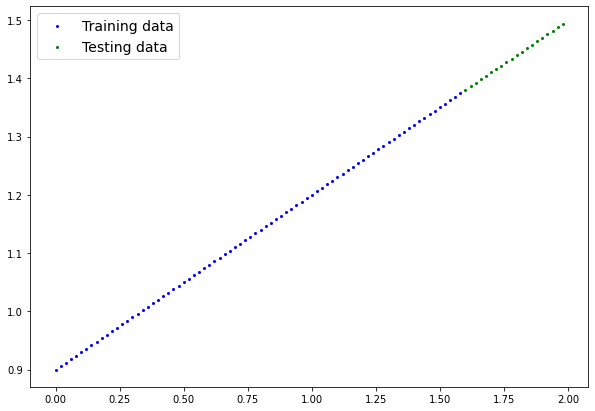

In [ ]:
# plot the data
plot_predictions()

### 2. Build a PyTorch model by subclassing nn.Module. Inside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias. Implement the forward() method to compute the linear regression function you used to create the dataset in 1. Once you've constructed the model, make an instance of it and check its state_dict().

In [ ]:
# Create PyTorch linear regression model by subclassing nn.Module
## Option 1
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(data=torch.randn(1,
                                              requires_grad=True,
                                              dtype=torch.float
                                              ))

    self.bias = nn.Parameter(data=torch.randn(1,
                                              requires_grad=True,
                                              dtype=torch.float
                                              ))

  def forward(self, x):
    return self.weight * x + self.bias

# ## Option 2
# class LinearRegressionModel(nn.Module):
#   def __init__(self):
#     super().__init__()
#     self.linear_layer = nn.Linear(in_features = 1,
#                                   out_features = 1)
#   def forward(self,x : torch.Tensor) -> torch.Tensor:
#     return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModel()
model_1,model_1.state_dict()

(LinearRegressionModel(),
 OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))]))

In [ ]:
# check model's device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
# Instantiate the model and put it to the target device
model_1.to(device)
list(model_1.parameters())

[Parameter containing:
 tensor([0.3367], device='cuda:0', requires_grad=True), Parameter containing:
 tensor([0.1288], device='cuda:0', requires_grad=True)]

In [ ]:
# check model's device now
next(model_1.parameters()).device

device(type='cuda', index=0)

### 3. Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively. Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2. Write a training loop to perform the appropriate training steps for 300 epochs. The training loop should test the model on the test dataset every 20 epochs.

In [ ]:
# Create the loss function and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.01)

In [ ]:
# Training loop
# Train model for 300 epochs
torch.manual_seed(42)

epochs = 300

# Send data to target device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  ### Training

  # Put model in train mode
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Calculate loss
  loss = loss_fn(y_pred,y_train)

  # 3. Zero gradients
  optimizer.zero_grad()

  # 4. Backpropagation
  loss.backward()

  # 5. Step the optimizer
  optimizer.step()

  ### Perform testing every 20 epochs
  if epoch % 20 == 0:
    # Put model in evaluation mode and setup inference context
    model_1.eval()
    with torch.inference_mode():
      # 1. Forward pass
      y_preds = model_1(X_test)
      # 2. Calculate test loss
      test_loss = loss_fn(y_preds,y_test)
      # Print out what's happening
      print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")

Epoch: 0 | Train loss: 0.742 | Test loss: 0.681
Epoch: 20 | Train loss: 0.417 | Test loss: 0.199
Epoch: 40 | Train loss: 0.166 | Test loss: 0.192
Epoch: 60 | Train loss: 0.135 | Test loss: 0.244
Epoch: 80 | Train loss: 0.116 | Test loss: 0.225
Epoch: 100 | Train loss: 0.098 | Test loss: 0.193
Epoch: 120 | Train loss: 0.080 | Test loss: 0.156
Epoch: 140 | Train loss: 0.062 | Test loss: 0.120
Epoch: 160 | Train loss: 0.043 | Test loss: 0.085
Epoch: 180 | Train loss: 0.025 | Test loss: 0.049
Epoch: 200 | Train loss: 0.007 | Test loss: 0.013
Epoch: 220 | Train loss: 0.011 | Test loss: 0.006
Epoch: 240 | Train loss: 0.011 | Test loss: 0.006
Epoch: 260 | Train loss: 0.011 | Test loss: 0.006
Epoch: 280 | Train loss: 0.011 | Test loss: 0.006


In [ ]:
# also check model's optimized parameters
model_1.state_dict()

OrderedDict([('weight', tensor([0.3071], device='cuda:0')),
             ('bias', tensor([0.9053], device='cuda:0'))])

### 4. Make predictions with the trained model on the test data. Visualize these predictions against the original training and testing data (note: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [ ]:
# Make predictions with the model
model_1.eval()

with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[1.3967],
        [1.4028],
        [1.4090],
        [1.4151],
        [1.4213],
        [1.4274],
        [1.4336],
        [1.4397],
        [1.4458],
        [1.4520],
        [1.4581],
        [1.4643],
        [1.4704],
        [1.4766],
        [1.4827],
        [1.4888],
        [1.4950],
        [1.5011],
        [1.5073],
        [1.5134]], device='cuda:0')

In [ ]:
# as we see y_preds are on cuda, but to plot the predictions, we must use matplotlib which belongs to
# numpy which is based on cpu, so we transfer y_preds on cpu
y_preds.cpu()

tensor([[1.3967],
        [1.4028],
        [1.4090],
        [1.4151],
        [1.4213],
        [1.4274],
        [1.4336],
        [1.4397],
        [1.4458],
        [1.4520],
        [1.4581],
        [1.4643],
        [1.4704],
        [1.4766],
        [1.4827],
        [1.4888],
        [1.4950],
        [1.5011],
        [1.5073],
        [1.5134]])

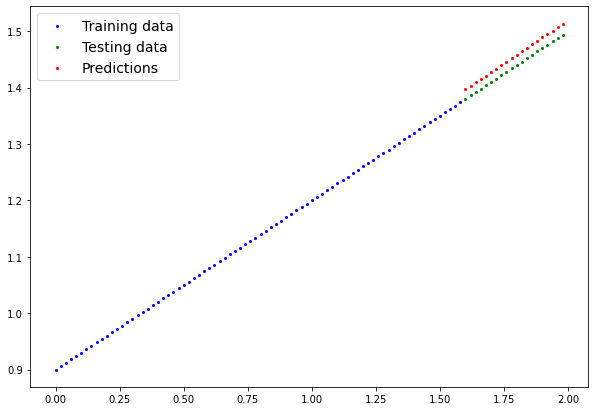

In [ ]:
# Plot the predictions (these may need to be on a specific device)
plot_predictions(predictions = y_preds.cpu())

### 5. Save your trained model's state_dict() to file. Create a new instance of your model class you made in 2. and load in the state_dict() you just saved to it. Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [ ]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True,exist_ok = True)
# 2. Create model save path
MODEL_NAME = "01_pytorch_model"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
# 3. Save the model state dict
print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(obj = model_1.state_dict(),f = MODEL_SAVE_PATH)

Saving model to models/01_pytorch_model


In [ ]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)
loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(torch.load(f = MODEL_SAVE_PATH))
loaded_model.to(device)

LinearRegressionModel()

In [ ]:
# Make predictions with loaded model and compare them to the previous
y_preds_new = loaded_model(X_test)
y_preds == y_preds_new

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

In [ ]:
# check if the best values of parameters are the same to both original and loaded models
loaded_model.state_dict()

OrderedDict([('weight', tensor([0.3071], device='cuda:0')),
             ('bias', tensor([0.9053], device='cuda:0'))])